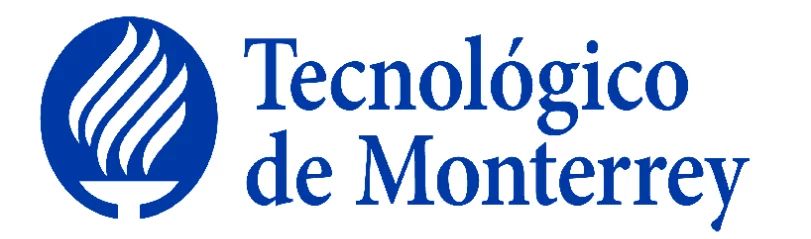

#Exploratory Data Analysis  in Python
###Por: Rigoberto Vega Escudero A01793132

Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:

- summarize main characteristics of the data - gain better understanding of the dataset,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve.


The main question we are trying to answer in this module is:

“What are the characteristics that have the most impact on the car price?”

Descriptive Statistics, which describe basic features of a dataset and obtains a short summary about the sample and measures of the data.

ANOVA, the analysis of variance, a statistical method in which the variation in a set of observations is divided into distinct components.

The Correlation between different variables.

And lastly, Advanced Correlation, where we’ll introduce you to various correlation statistical methods.


In [57]:
#First we impor pandas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#Use the readcsv method, note here is that our data does not have column labels or headers, so we need to specify that in our module as below
df = pd.read_csv(url, header= None)

df #prints the entire dataframe (not recommended for large datasets)
#Adding a list with all the headers names that we will use
headers = ["symboling", "normalized-losses", "make","fuel-type","aspiration:","num-of-doors",
           "body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers #Code to remplace the headers name with the list elements
df


,symboling,normalized-losses,make,fuel-type,aspiration:,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


##Descriptive Statistics.

When you begin to analyze data, it’s important to first explore your data before you spend time building complicated models. One easy way to do so is to calculate some descriptive statistics for your data. Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the sample and measures of the data.


###.describe()

The describe() function in pandas. Using the describe function and applying it on your dataframe, the "describe" function automatically computes basic statistics for all numerical variables. It shows the mean, the total number of data points, the standard deviation, the quartiles and the extreme values. Any NaN values are automatically skipped in these statistics.

In [58]:
#using the function
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


###.value_counts()

Sumamarize the categorical data is by using this method.


We could have also categorical variables in your dataset. These are variables that can be divided up into different categories.



In [50]:
#Try the code

drive_wheels_counts = pd.DataFrame(df['drive-wheels'].value_counts())

drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True )
drive_wheels_counts.index.name= 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


###Bloxpot

Boxplots are a great way to visualize numeric
data, since you can visualize the various distributions of the data.

The main features that the boxplot shows are the median of the data, which represents where
the middle datapoint is. The Upper Quartile shows where the 75th percentile is, the Lower Quartile shows where the 25th percentile is. The data between the Upper and Lower Quartile represents the Interquartile Range.

Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.

Finally, boxplots also display outliers as individual dots that occur outside the upper and lower extremes. With boxplots, you can easily spot outliers.

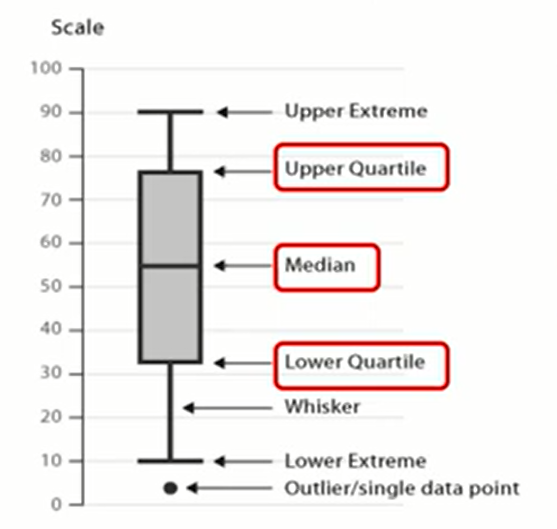

In [59]:
df['price'] = df['price'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['price'] = df['price'].astype('int') #Here we are changing the datatype form object to integer
df['price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

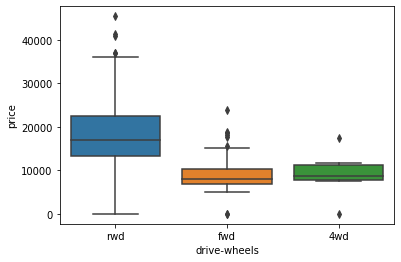

In [60]:
#try the code
result = df.copy()
result = result.assign(Names=result['drive-wheels'].astype('category'), 
                       Values=result['price'].astype(np.float32))

sns.boxplot(x= 'drive-wheels', y='price', data=result)

###Scater plot

Often times we tend to see continuous variables in our data. These data points are numbers contained in some range. For example, in our dataset, price and engine size are continuous variables. What if we want to understand the relationship between “engine size” and ”price”? Could engine size possibly predict the price of a car? One good way to visualize this is using a scatter plot. 

Each observation in a scatter plot is represented as a point. This plot shows the relationship between two variables:

- The predictor variable: is the variable that you are using to predict an outcome. In this case, our predictor variable is the engine size.

- The target variable: is the variable that you are trying to predict. In this case, our target variable is the price, since this would be the outcome.

In a scatterplot, we typically set the predictor variable on the x-axis, or horizontal axis and we set the target variable on the y-axis or vertical axis.

Text(0, 0.5, 'Price')

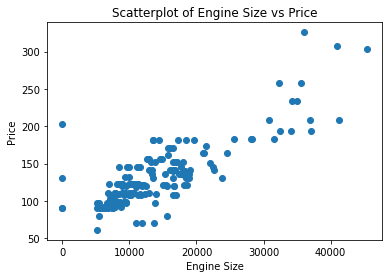

In [44]:
#Try the code
#Generate the scatter plot graph
y = df['engine-size']
x = df['price']
plt.scatter(x,y)

#Labeling as a good manner of coding

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

##Gruping

Assume you want to know: Is there any relationship between the different types of input columns in you dataser against the output.

If so, which type of data adds the most value to a the output? It would be nice if we could group all the data by the different types and compare the results of these different results against each other.

###.groupby()

In pandas this can be done using the group by method.
The group by method is used on categorical variables, groups the data into subsets according to the different categories of that variable.

You can group by a single variable or you can group by multiple variables by passing in multiple variable names.

In [80]:
#try the code
#copy the datasets to a new variable
df_test = df[['drive-wheels', 'body-style', 'price']]
#applying the method groupby to extract the data accorting to the price
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp['price']

0      3801.500000
1     12647.333333
2      9095.750000
3     11595.000000
4      8249.000000
5      8396.387755
6      9467.526316
7      9997.333333
8     23949.600000
9     24202.714286
10    13583.157895
11    21711.833333
12    16994.222222
Name: price, dtype: float64

###.pivot()

To make it easier to understand, we can transform this table to a pivot table by using the pivot
method.

In the previous table, both ‘drive-wheels’ and ‘body-style’ were listed in columns.

A pivot table has one variable displayed along the columns and the other variable displayed along the rows.

In [ ]:
#try the code
#using the pivot method to create the new table to make a better understanding of the data

df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

###Heatmap
Heatmap takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.

It is a great way to plot the target variable over multiple variables and through this get visual clues of the relationship between these variables and the target.

<function matplotlib.pyplot.show(*args, **kw)>

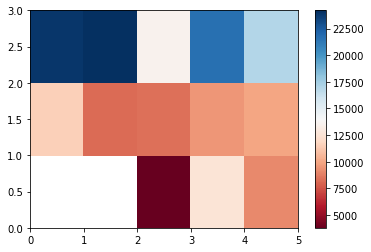

In [ ]:
#try the code

#creating the heatmap graph

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show


##ANOVA analysis of Variance

ANOVA is a statistical test that stands for "Analysis of Variance".

ANOVA can be used to find the correlation between different groups of a categorical
variable.
According to the car dataset, we can use ANOVA to see if there is any difference in mean price for the different car makes such as Subaru and Honda.
The ANOVA test returns two values: the F-test score and the p-value. The F-test calculates the ratio of variation between the groups's mean over the variation
within each of the sample groups.

The p-value shows whether the obtained result is statistically significant. Without going too deep into the details, the F-test calculates the ratio of variation between group means over the variation within each of the sample group means.

This diagram illustrates a case where the F-test score would be small. Because, as we can see the variation of the prices in each group of data is way larger than the differences between the average values of each group.
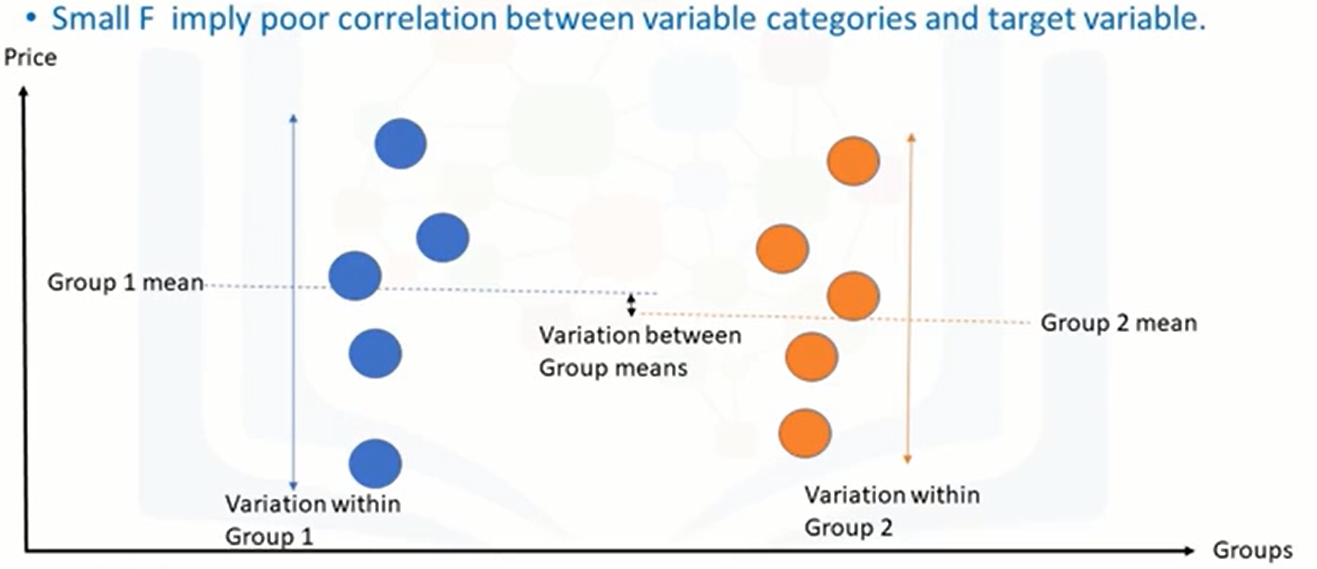

In this second diagram, we see a case where the F-test score would be large.
The variation between the averages of the two groups is comparable to the variations within the two groups.
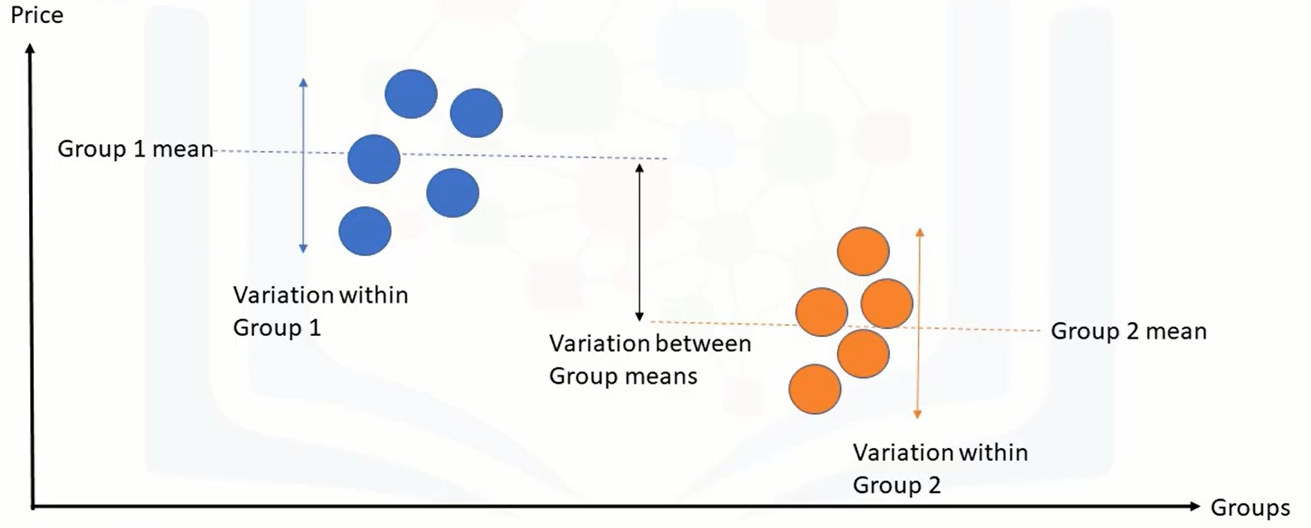


In [63]:
#Try the code
#Extrac the data form the original dataset
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])

anova_results_l=stats.f_oneway(grouped_anova.get_group('honda')['price'],
                               grouped_anova.get_group('subaru')['price'])
print(anova_results_l)

anova_results_l2=stats.f_oneway(grouped_anova.get_group('honda')['price'],
                               grouped_anova.get_group('jaguar')['price'])
print(anova_results_l2)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


##Correlation
Correlation is a statistical metric for measuring to what extent different variables are interdependent.
In other words, when we look at two variables over time, if one variable changes, how does this effect change in the other variable?

It is important to know that correlation doesn’t imply causation.

In fact, we can say that umbrella and rain are correlated, but we would not have enough information to say whether the umbrella caused the rain or the rain caused the umbrella. In data science, we usually deal more with correlation.


(0.0, 52768.96444795169)

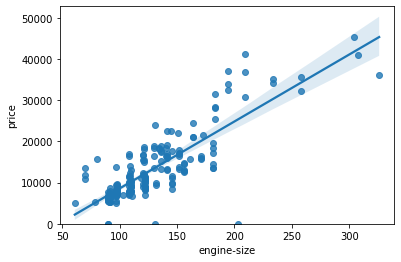

In [64]:
#Try the code
#Lets do the correlation of the columns price and engine-size

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

(0.0, 48156.80672637759)

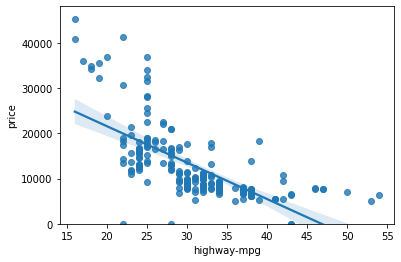

In [65]:
#Lets do the correlation of the columns price and highway-mpg
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [69]:
df['peak-rpm'] = df['peak-rpm'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['peak-rpm'] = df['peak-rpm'].astype('int') #Here we are changing the datatype form object to integer
df['peak-rpm'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

(0.0, 47670.0)

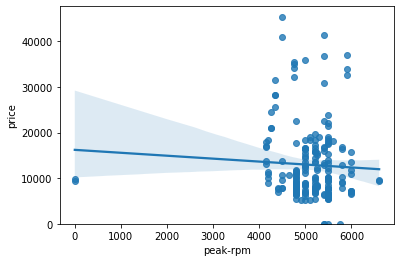

In [70]:
#Lets do the correlation of the columns price and peak-rpm

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

##Pearson correlation

One way to measure the strength of the correlation between continuous numerical variables is by using a method called Pearson Correlation.

The Pearson correlation method, will give you two values, the Correlation coefficient and the p-value.
So how do we interpret these values?

For the correlation coefficient, a value close to 1 implies a large positive correlation, while a value close to -1 implies a large negative correlation and a value close to 0 implies no correlation between the variables.

Next, the p-value will tell us how certain we are about the correlation that we calculated.
For the p-value, a value less than 0.001 gives us a strong certainty about the correlation coefficient that we calculated.

A value between 0.001 and 0.05 gives us moderate certainty, a value between 0.05 and 0.1 will give us a weak certainty and a p-value larger than 0.1 will give us no certainty of correlation at all.
We can say that there is a strong correlation when the correlation coefficient is close to 1 or -1 and the p-value is less than 0.001.

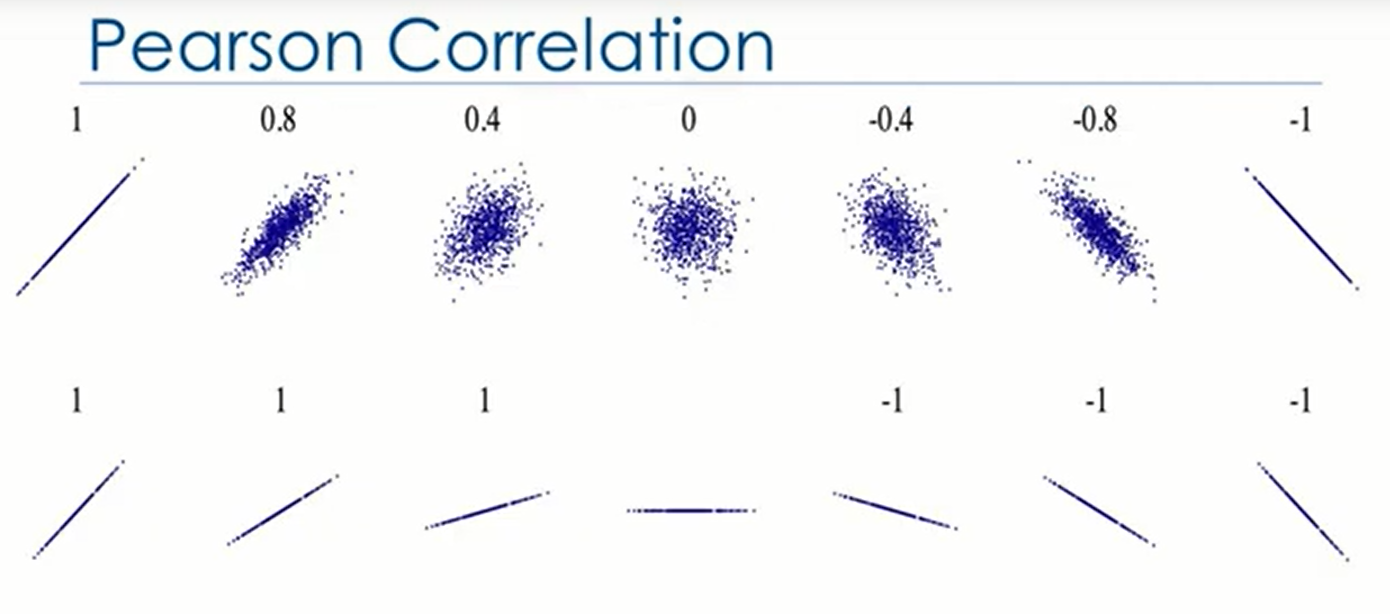

In [74]:
df['horsepower'] = df['horsepower'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['horsepower'] = df['horsepower'].astype('int') #Here we are changing the datatype form object to integer
df['horsepower'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

In [78]:
#Try the code
#Check the correlation for the columns horsepower and price

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f"Pearson correlation: {pearson_coef}")
print(f"P-value: {p_value}")

Pearson correlation: 0.6912878787942788
P-value: 1.8175735366187956e-30
